Exploratory analysis of feature files
---
feature files created by create_feature_file.py

In [38]:
%matplotlib inline

import pandas as pd
import numpy as np

df = pd.read_csv('features.set3.csv')

def summarize(col):
    df[col].plot(kind='hist')
    print(df[col].describe())
    print("first quartile: {}".format(df[col].quantile(0.25)))
    print("last quartile: {}".format(df[col].quantile(0.75)))

count    5324.000000
mean      -14.959468
std         4.065901
min       -23.684871
25%       -17.965660
50%       -15.324782
75%       -12.433813
max        -0.426711
Name: environmentScoreSlope, dtype: float64
first quartile: -17.965660015675
last quartile: -12.433813333800002


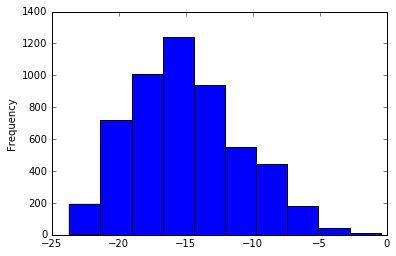

In [39]:
summarize('environmentScoreSlope')

count    701.000000
mean      -0.000829
std        0.000058
min       -0.001457
25%       -0.000830
50%       -0.000828
75%       -0.000826
max       -0.000213
Name: environmentScoreLogSlope, dtype: float64
first quartile: -0.0008298477684560001
last quartile: -0.00082556965455


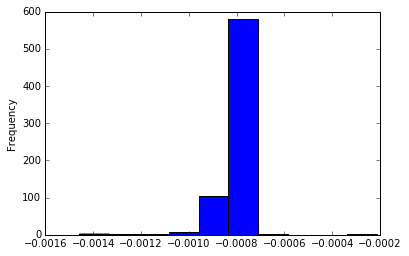

In [33]:
summarize('environmentScoreLogSlope')

first quartile: -1.79339321635
last quartile: -1.3669127052899999


count    221.000000
mean      -1.618784
std        0.479424
min       -2.953609
25%       -1.793393
50%       -1.538381
75%       -1.366913
max       -0.719778
Name: shannonBiomassSlope, dtype: float64

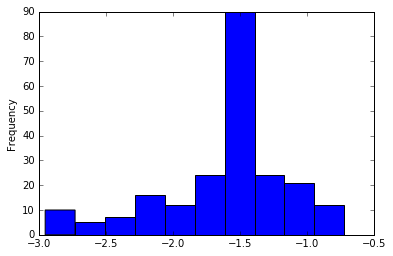

In [9]:
df['shannonBiomassSlope'].plot(kind='hist')
print("first quartile: {}".format(df['shannonBiomassSlope'].quantile(0.25)))
print("last quartile: {}".format(df['shannonBiomassSlope'].quantile(0.75)))
df['shannonBiomassSlope'].describe()

count    221.000000
mean      -0.048078
std        0.020509
min       -0.088892
25%       -0.058846
50%       -0.054514
75%       -0.044097
max        0.068467
Name: peakNetProductionSlope, dtype: float64

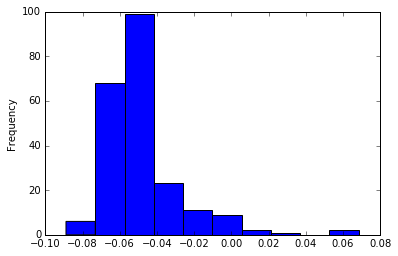

In [10]:
df['peakNetProductionSlope'].plot(kind='hist')
df['peakNetProductionSlope'].describe()

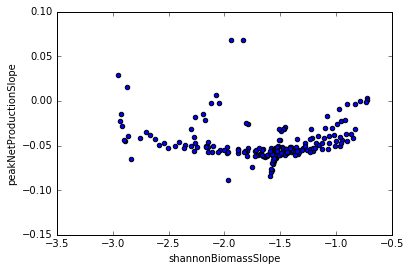

In [11]:
df.plot(kind='scatter', x='shannonBiomassSlope', y='peakNetProductionSlope')